In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Create a sample dataset
data = {
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 65, 100),
    'Tenure': np.random.randint(1, 11, 100),
    'Churn': np.random.choice([0, 1], 100, p=[0.7, 0.3])  # 0: Not Churned, 1: Churned
    }
df = pd.DataFrame(data)

In [17]:
#Data Aggregation
agg_data = df.groupby('Churn').agg({'Age': 'mean', 'Tenure': 'mean'}).reset_index()
agg_data.columns = ['Churn', 'Average Age', 'Average Tenure']
print("Aggregated Data (Average Age and Tenure):")
print(agg_data)

Aggregated Data (Average Age and Tenure):
   Churn  Average Age  Average Tenure
0      0    38.785714        5.528571
1      1    38.400000        5.033333


In [18]:
#Data Splitting
X = df[['Age', 'Tenure']]  # Features
y = df['Churn']  # Target variable

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Model Training
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [21]:
# Predictions
y_pred = model.predict(X_test)

In [22]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Logistic Regression Model: {accuracy * 100:.2f}%")



Accuracy of the Logistic Regression Model: 65.00%



Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20


Confusion Matrix:


C:\Users\win10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\win10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\win10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

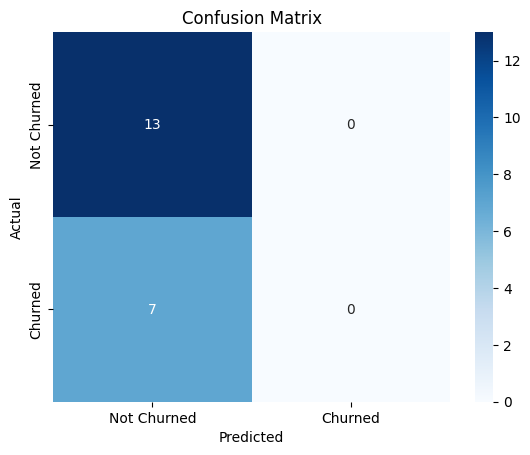

In [23]:
# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()